In [57]:
import pickle
import numpy as np
import h5py
import json
import sys
np.set_printoptions(threshold=sys.maxsize)
import seaborn as sns
import matplotlib.pylab as plt
import cv2
import os
from pathlib import Path


# dataset_name = "SumMe"
dataset_name = "TVSum"

model_score = pickle.load(
    open(f"./{dataset_name.lower()}_video_scores.pickle", "rb")
)

if dataset_name == "SumMe":
    video_path = "../../../data/SumMe/videos/"
elif dataset_name == "TVSum":
    video_path = "../../../data/tvsum50_ver_1_1/ydata-tvsum50-v1_1/ydata-tvsum50-video/video/"

data_path = (
    f"../data/{dataset_name}/eccv16_dataset_{dataset_name.lower()}_google_pool5.h5"
)
hdf = h5py.File(data_path, "r")  # Open hdf file


# TVSum: XzYM3PfTM4w
# SumMe: St Maarten Landing

splits = json.loads(
    open(f"../data/splits/{dataset_name.lower()}_splits.json", "r").read()
)


if dataset_name == "SumMe":
#     s = 2
    s = 2
elif dataset_name == "TVSum":
    s = 4

keys = splits[s]["train_keys"]
# keys = splits[s]["test_keys"]

# Get video name

video2index = {}
index2video = {}
frame2video = {}

for i, video_name in enumerate(keys):
    if dataset_name == "SumMe":
        video_full_name = np.array(hdf[video_name]["video_name"]).astype(str).tolist()
        video2index[video_full_name] = video_name 
        index2video[video_name] = video_full_name 
    elif dataset_name == "TVSum":        
        for key in list(hdf.keys()):
            nframes = int(np.array(hdf[key]["n_frames"]))
            frame2video[nframes] = key

        for video_full_name, data in model_score.items():
            video2index[video_full_name] = frame2video[data["summary"].shape[0]]
            index2video[frame2video[data["summary"].shape[0]]] = video_full_name


In [58]:
# print(model_score)
# print(video2index)

video: iVt07TCkFM0
0.1464
torch.Size([17, 17])
iVt07TCkFM0 video_45
2500
(17, 2)
(20, 2500)
17
tensor(0.0493)
tensor(0.0458)
tensor(1.0000)
tensor(0.9999)
tensor(0.0431)
tensor(0.0386)
tensor(0.0487)
tensor(0.0530)
tensor(0.0510)
tensor(0.0374)
tensor(0.0256)
tensor(0.0535)
tensor(0.0432)
tensor(0.0430)
tensor(0.0416)
tensor(0.0606)
tensor(0.0510)


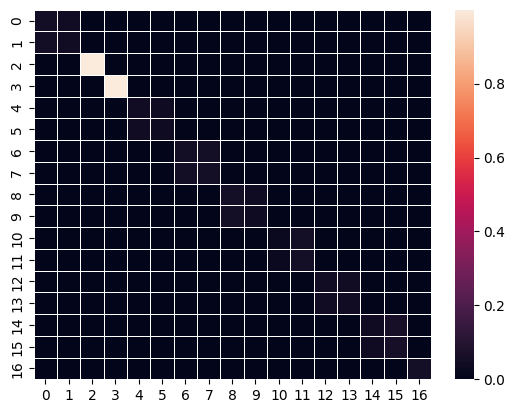

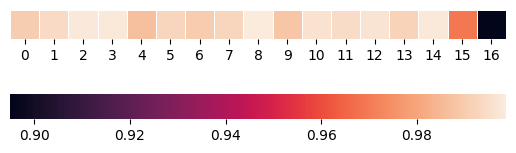

[0.9904294013977051, 0.9938616752624512, 0.997927188873291, 0.9977579712867737, 0.9865698218345642, 0.9926666617393494, 0.9901013374328613, 0.9929004907608032, 0.9986913800239563, 0.9883272051811218, 0.9958712458610535, 0.9942564368247986, 0.996311366558075, 0.9919663667678833, 0.9978405237197876, 0.9693751335144043, 0.8948869109153748]
tensor([[4.9332e-02, 4.5810e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [4.9332e-02, 4.5810e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.0000e+00, 4.3541e-07, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.

In [88]:
for video_name, data in model_score.items():
    if dataset_name == "SumMe":
        if "Bike Polo" not in video_name:
            continue
    elif dataset_name == "TVSum": 
        if "iVt07TCkFM0" not in video_name:
            continue
    print("video:", video_name)
    summary = data['summary']
    score = data['score']
    attn_weights = data['attn_weights'].cpu()
    if dataset_name == "SumMe":
        best_user = data['best_user']
    
    unique, counts = np.unique(summary, return_counts=True)
    values = dict(zip(unique, counts))
    print(values[1] / len(summary))
    
    print(attn_weights.shape)
    
    
    index = video2index[video_name]
    n_frames = np.array(hdf[index]["n_frames"])
    change_points = np.array(hdf[index]["change_points"])
    user_summary = np.array(hdf[index]["user_summary"])
    print(video_name, index)
    print(n_frames)
    print(change_points.shape)
    print(user_summary.shape)
    print(attn_weights.shape[0])
    for i in range(attn_weights.shape[0]):
        print(attn_weights[i][i])
        

    ax = sns.heatmap(attn_weights, linewidth=0.5)
    plt.grid(False)
    plt.show()
    
    ax = sns.heatmap(np.array(score).reshape((1, -1)), linewidth=0.5, square=True, cbar_kws={"orientation": "horizontal"})
    plt.yticks([])
    plt.grid(False)
    plt.show()
    
    
#     print(summary)
    print(score)
    print(attn_weights)
#     idx = 90
#     step = 30
#     accepted_index = (
#         [i for i in range(0, idx, step)]
#         + [i for i in range(int(n_frames / 2), int(n_frames / 2) + idx, step)]
#         + [i for i in range(n_frames - idx, n_frames, step)]
#     )

#     num_imgs = 10
#     step = int(n_frames / num_imgs)
#     print(step)

#     accepted_index = [i for i in range(0, n_frames, step)]

#     print(accepted_index)

#     count = 0
    
#     parent_path = f"frames/{video_name}/"
#     Path(parent_path).mkdir(parents=True, exist_ok=True)
    
#     video_full_path = os.path.join(video_path, f"{video_name}.mp4")
#     print(video_full_path)
#     video = cv2.VideoCapture(video_full_path)
#     print("opened!")
#     while True:
#         success, image = video.read()
#         if success:
#             if count in accepted_index:
#                 img_name = parent_path + video_name + "_" + str(count) + ".jpg"
#                 print(f"save img {img_name}")
#                 cv2.imwrite(img_name, image)
#         else:
#             break
#         count += 1

#         if video.get(cv2.CAP_PROP_POS_FRAMES) == video.get(
#             cv2.CAP_PROP_FRAME_COUNT
#         ):
#             # If the end of the video has been reached, break out of the loop
#             break

#     video.release()
#     cv2.destroyAllWindows()
#     print("closed!")

In [ ]:
# plt.imshow(attn_weights.cpu(), cmap='hot', interpolation='nearest')

In [15]:
# import matplot
# def plot_attention(data, X_label=None, Y_label=None):
#     '''
#       Plot the attention model heatmap
#       Args:
#         data: attn_matrix with shape [ty, tx], cutted before 'PAD'
#         X_label: list of size tx, encoder tags
#         Y_label: list of size ty, decoder tags
#     '''
#     fig, ax = plt.subplots(figsize=(20, 8))  # set figure size
#     heatmap = ax.pcolor(data, cmap=plt.cm.Blues, alpha=0.9)

#     # Set axis labels
#     if X_label != None and Y_label != None:
#         #X_label = [x_label for x_label in X_label]
#         #Y_label = [y_label for y_label in Y_label]

#         xticks = range(0, len(X_label))
#         ax.set_xticks(xticks, minor=False)  # major ticks
#         ax.set_xticklabels(X_label, minor=False, rotation=45)  # labels should be 'unicode'

#         yticks = range(0, len(Y_label))
#         ax.set_yticks(yticks, minor=False)
#         ax.set_yticklabels(Y_label, minor=False)  # labels should be 'unicode'

#         ax.grid(True)

#     # Save Figure
#     plt.title(u'Attention Heatmap')
#     file_name = './attention_heatmap.eps'
#     print("Saving figures %s" % file_name)
#     fig.savefig(file_name)  # save the figure to file
#     plt.close(fig)  # close the figure


# if __name__ == '__main__':
#     f = open('new.txt').readlines()
#     d = [[float(num) for num in line.strip().split()] for line in f]
#     d = np.array(d)
#     x_str = 'the french ship [OOV] wallis , dwt , [OOV] at the port of [OOV] in victoria today to load tonnes of urgently needed wheat for fiji after australian port unions partly lifted a trade embargo , shipping sources said . the wheat is expected to be loaded tomorrow , an australian wheat board spokesman said . reuter '
#     x_label = x_str.split()
#     y_label = ['grain', 'wheat', 'EOS']
#     plot_attention(d, x_label, y_label)

0.14905873881287934